In [1]:
library(ggplot2)
library(Seurat)
library(plyr)
library(dplyr)
library(Matrix)
library(cowplot)
library(cFIT)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
aggr.data <- Read10X("GFP_day3_CR6_no_norm/filtered_feature_bc_matrix")

genes.seurat <- CreateSeuratObject(aggr.data, min.cells = 10, min.features = 200, project = "GFP_day3")
remove(aggr.data)

genes.seurat[["percent.mt"]] <- PercentageFeatureSet(genes.seurat, pattern = "^mt-")

experiment <- sub(".*-(.*)","\\1", colnames(genes.seurat))
experiment <- plyr::mapvalues(experiment, 
                              from = as.character(c(1, 2)),
                              to = c("Sham", "MI-day 3"))

names(experiment) = colnames(experiment)
table(experiment)
genes.seurat <- AddMetaData(genes.seurat, experiment, col.name = "Condition")

genes.seurat@meta.data$Condition <- factor(genes.seurat@meta.data$Condition,
                                           levels = c("Sham", "MI-day 3"))
table( genes.seurat@meta.data$Condition )


experiment
MI-day 3     Sham 
    4186     2452 


    Sham MI-day 3 
    2452     4186 

Plot some QC metrics:

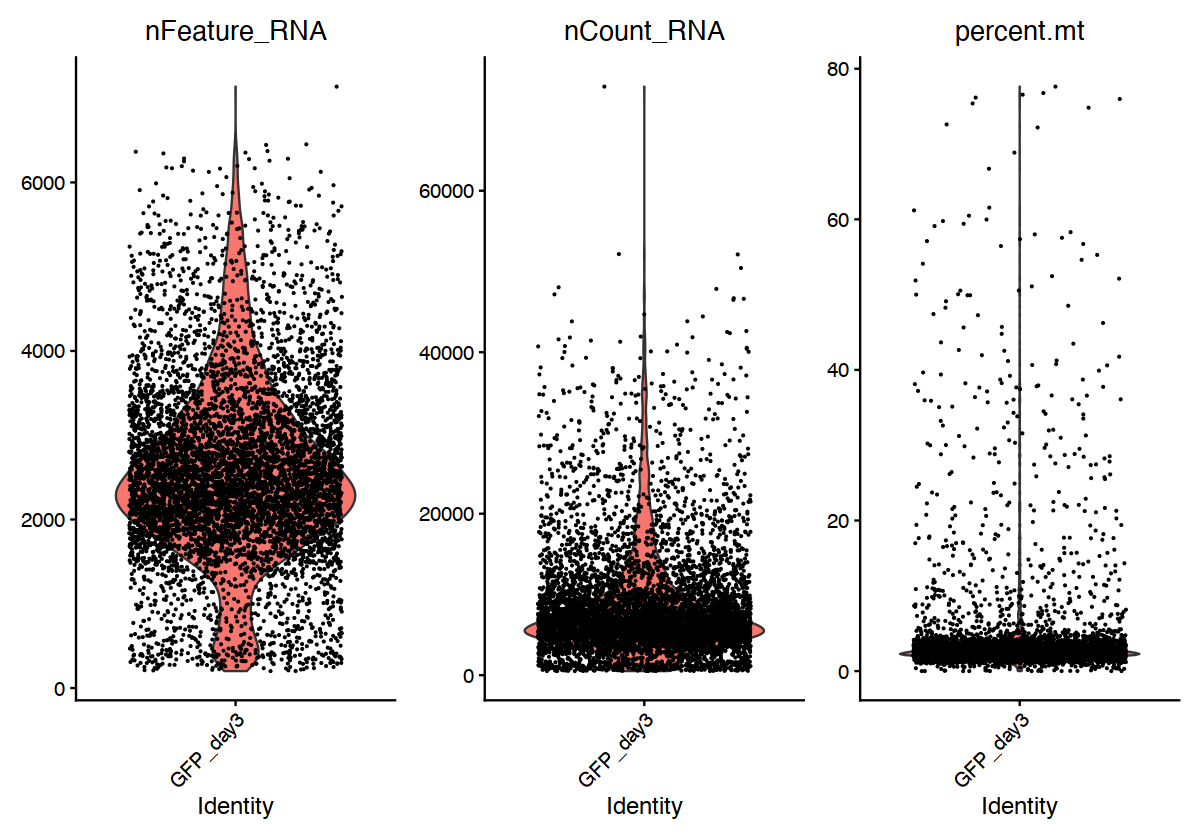

In [7]:
#Violin plot of QC metrics
options(repr.plot.width=10, repr.plot.height=7)
VlnPlot(genes.seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

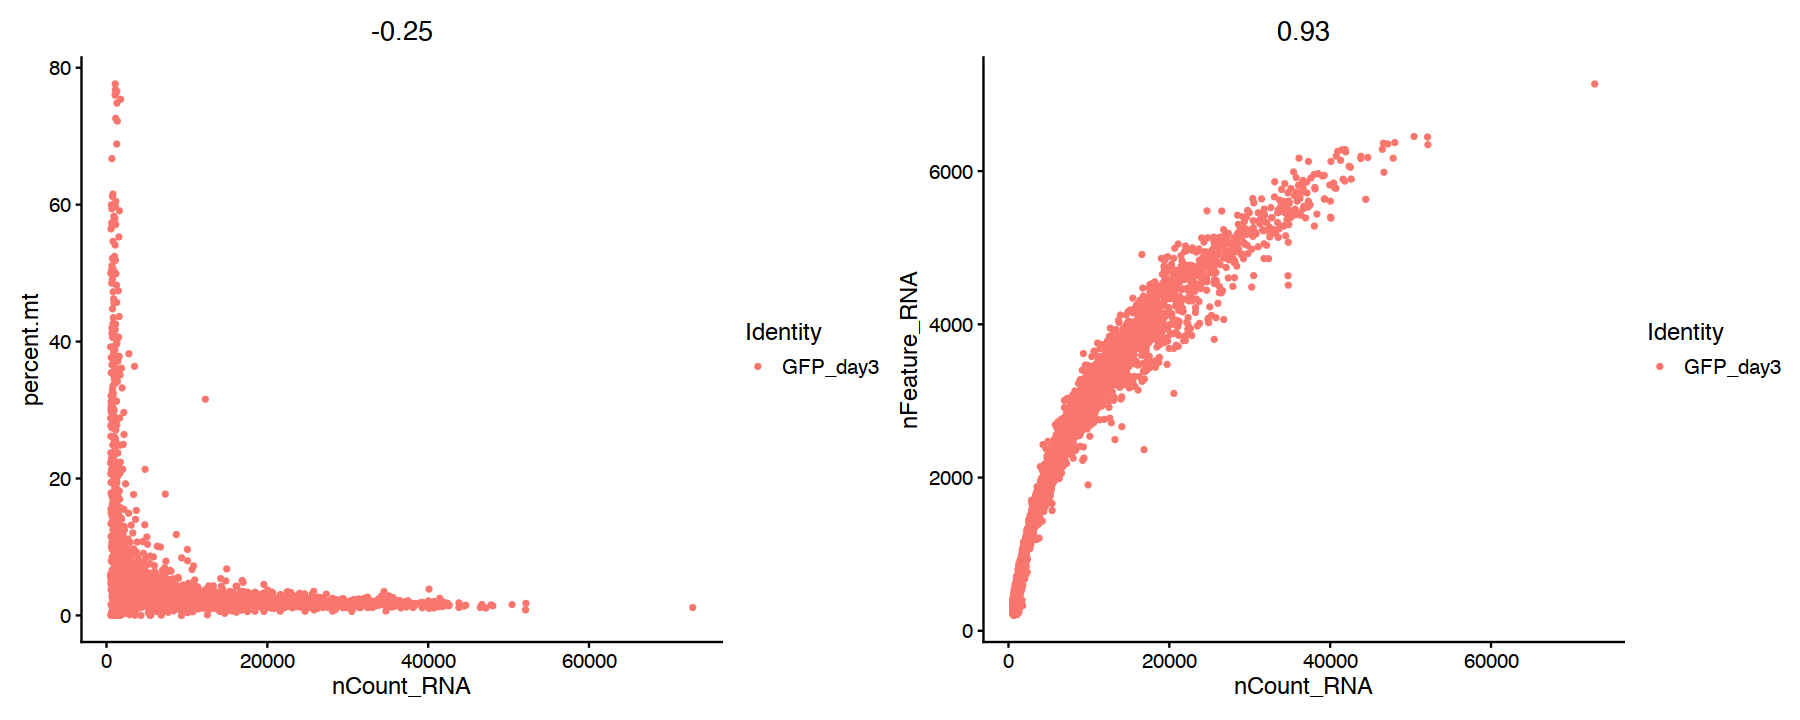

In [5]:
options(repr.plot.width=15, repr.plot.height=6)
plot1 <- FeatureScatter(genes.seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(genes.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [8]:
# Normalise data
genes.seurat <- NormalizeData(object = genes.seurat,
                              normalization.method = "LogNormalize",
                              scale.factor = 10000)

# Find higly variable genes
genes.seurat <- FindVariableFeatures(object = genes.seurat, mean.function = "vst", nfeatures = 2000)

# Regress of unwanted variation
genes.seurat <- ScaleData(genes.seurat,  verbose = TRUE)

genes.seurat <- RunPCA(object = genes.seurat, features = VariableFeatures(object = genes.seurat), npcs=25)

## Clustering
genes.seurat <- FindNeighbors(genes.seurat, dims = 1:25)
genes.seurat <- FindClusters(genes.seurat, resolution = 0.6)

### UMAP/t-SNE analysis
genes.seurat <- RunUMAP(genes.seurat, dims = 1:25)

Centering and scaling data matrix

PC_ 1 
Positive:  Col1a2, Col1a1, Col3a1, Mgp, Serpinh1, Prelp, Mfap5, Pi16, Timp3, G0s2 
	   Oaf, Fxyd6, Igfbp6, C3, Cald1, Sfrp1, Nupr1, Abi3bp, Eln, Gas5 
	   Aspn, Hsd11b1, Gsta3, Hspb1, Id3, Nbl1, Scara5, Fbn1, Col5a2, Ifi205 
Negative:  Ctss, Fcer1g, Cd68, Tyrobp, Trem2, Ms4a6d, Lilrb4a, Lyz2, C3ar1, Wfdc17 
	   Alox5ap, Cd53, Fcgr3, Lat2, Ms4a7, Bcl2a1b, Fcgr1, Msr1, Laptm5, Spi1 
	   Lgals3, Mpeg1, Lilr4b, Ms4a6c, Lcp1, C5ar1, Cd48, Coro1a, Ccl6, Cd300c2 
PC_ 2 
Positive:  Timp1, Spc24, Pclaf, Birc5, Cks2, Cdca3, Stmn1, Acta2, Ran, Ccna2 
	   Cdca8, Tk1, Cdc20, Ccnb2, Hmmr, Cenpa, Cenpm, Tpm2, Slc25a5, Ccnb1 
	   Tagln2, Rps2, Actn1, Eif5a, Nme2, Lrrc59, Tpx2, H2afz, Steap1, Fkbp11 
Negative:  Apoe, Timp3, Psap, G0s2, C3, Fmo2, Mafb, Scara5, Gas6, Gsta3 
	   Gm17167, Tyrobp, Fcer1g, Lpl, Penk, Prelp, Ctss, Laptm5, Gpnmb, Coro1a 
	   Spi1, Lilrb4a, Cd53, Inmt, Ms4a7, Wfdc17, Lcp1, C5ar1, Cd52, Lilr4b 
PC_ 3 
Positive:  Rplp0, Nme2, Rps2, Rpl15,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6638
Number of edges: 221756

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8243
Number of communities: 13
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:25:46 UMAP embedding parameters a = 0.9922 b = 1.112

14:25:46 Read 6638 rows and found 25 numeric columns

14:25:46 Using Annoy for neighbor search, n_neighbors = 30

14:25:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:25:46 Writing NN index file to temp file /var/folders/2p/fzztw4ls58lcjyzm918ky5900000gn/T//RtmpVT4Et8/file160766d7cc886

14:25:46 Searching Annoy index using 1 thread, search_k = 3000

14:25:47 Annoy recall = 100%

14:25:48 Commencing smooth kNN distance calibra

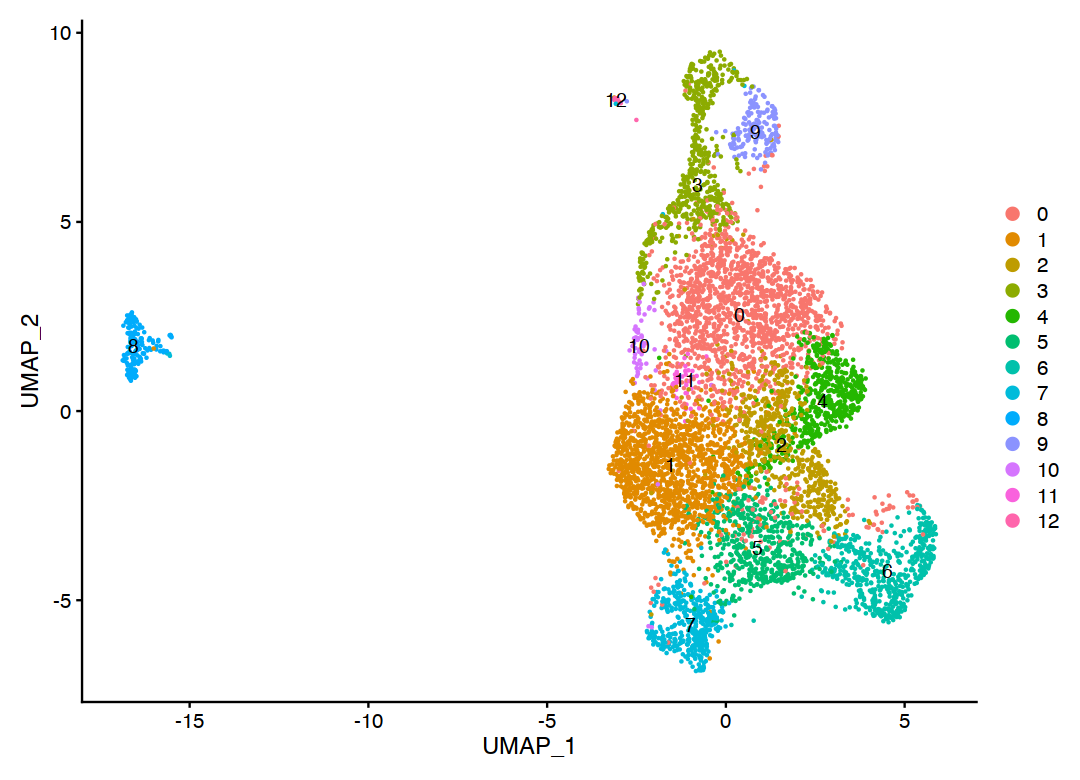

In [10]:
options(repr.plot.width=9, repr.plot.height=6.5) 
DimPlot(genes.seurat, reduction = "umap", label = TRUE)

# Doublet filtering

Visualise and filter doublets identified with Scrublet

[1] "Predicted singlets from Scrublet: 6770"
[1] "Overlap with filtered data: 6634"


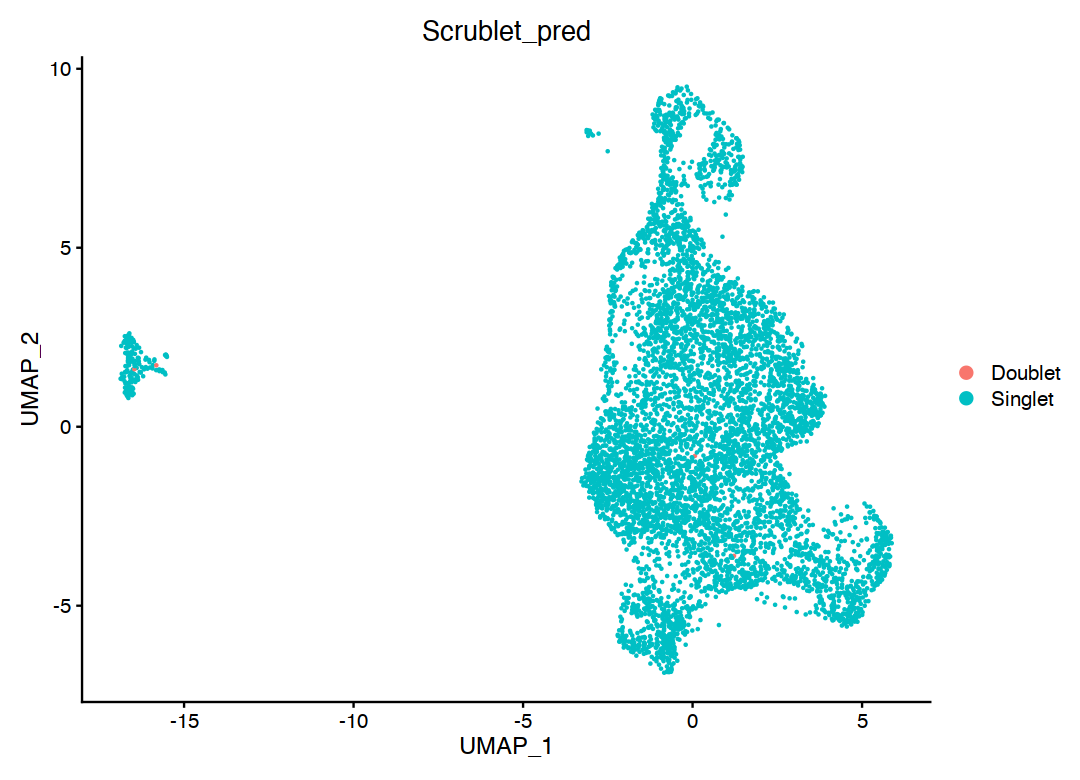

In [12]:
singlet.files <- c("Scrublet/Sham_singlets.txt",
                   "Scrublet/MI_singlets.txt")

all.singlets <- c()
for (this.file in singlet.files) {
  singlets <- readLines(this.file)
  all.singlets <- append(all.singlets, singlets)
}
print(paste("Predicted singlets from Scrublet:", length(all.singlets)))
print(paste("Overlap with filtered data:", length(intersect(colnames(genes.seurat), all.singlets))))

scrublet.doublet <- ifelse(colnames(genes.seurat) %in% all.singlets, "Singlet", "Doublet")
genes.seurat@meta.data$Scrublet_pred <- scrublet.doublet

options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(genes.seurat, group.by = "Scrublet_pred")

In [13]:
genes.seurat <- subset(genes.seurat, Scrublet_pred == "Singlet")
print(dim(genes.seurat))

[1] 14978  6634


# Assign cell identities from original clustering

In [14]:
gfp.day3.data <- read.csv("GFP_day3_filtered_Farbehi_etal_metadata.csv",
                          stringsAsFactors = FALSE, row.names = 1)
head( gfp.day3.data )

overlapping.cells <- intersect(colnames(genes.seurat), rownames(gfp.day3.data))
gfp.day3.data <- gfp.day3.data[overlapping.cells, ]

genes.seurat <- genes.seurat[, overlapping.cells]

cluster.ids <- gfp.day3.data$Original_clusters
names(cluster.ids) <- rownames(gfp.day3.data)

genes.seurat$Original_clusters <- cluster.ids
Idents(genes.seurat) <- genes.seurat$Original_clusters

,orig.ident,percent.mito,res.0.6,nCount_RNA,nFeature_RNA,Condition,Original_clusters
,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
AAACCTGAGACCTTTG-1,Day3,0.03397508,8,4415,1947,Uninjured,F-IFNS
ACTGAACTCACATGCA-1,Day3,0.04578646,8,5067,2142,Uninjured,F-IFNS
AGCGTATGTGTTTGTG-1,Day3,0.03592995,8,3312,1463,Uninjured,F-IFNS
AGGCCACGTAGCTGCC-1,Day3,0.02531286,8,7032,2416,Uninjured,F-IFNS
CACACCTTCACATACG-1,Day3,0.02738402,8,6208,2434,Uninjured,F-IFNS
CACTCCAAGGACCACA-1,Day3,0.02679231,8,5412,2245,Uninjured,F-IFNS


# Generate updated UMAP plot

In [15]:
# Normalise data
genes.seurat <- NormalizeData(object = genes.seurat,
                              normalization.method = "LogNormalize",
                              scale.factor = 10000)

# Find higly variable genes
genes.seurat <- FindVariableFeatures(object = genes.seurat, mean.function = "vst", nfeatures = 2000)

# Regress of unwanted variation
genes.seurat <- ScaleData(genes.seurat,
                          vars.to.regress = c("nCount_RNA"),
                          verbose = TRUE)

genes.seurat <- RunPCA(object = genes.seurat, features = VariableFeatures(object = genes.seurat), npcs=50)

### UMAP/t-SNE analysis
genes.seurat <- RunUMAP(genes.seurat,
                        n.neighbors = 30,
                        dims = 1:40,
                        min.dist = 0.25,
                        seed.use = 10)

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Mgp, Timp3, Apoe, Gas6, Igf1, Prg4, Sfrp1, Fxyd6, Dkk3, Ccl19 
	   Ecrg4, Meg3, Srpx, Hist1h2bc, Mfap4, Pdlim3, Mfap2, Abi3bp, Fgl2, Cpe 
	   Serpina3n, Col3a1, Rpl13a, Dhrs3, Cadm1, Wif1, Cxcl12, Prelp, Tst, Tmem100 
Negative:  Birc5, Ccna2, Cdca8, Tpx2, Hmmr, Cdc20, Ccnb1, Pclaf, Cks2, Cdca3 
	   Mki67, Pbk, Racgap1, Plk1, Spc24, Pimreg, Ckap2l, Tk1, Cenpe, Kif23 
	   Cenpa, Nuf2, Stmn1, Kif22, Mxd3, Kif2c, Kif20a, Cenpf, Knstrn, Ckap2 
PC_ 2 
Positive:  Pla1a, S100a6, Anxa3, Ly6a, Fbn1, Igfbp6, Cald1, Oaf, Klf4, Pi16 
	   S100a11, Ifi27l2a, Ifi205, Scara5, Col8a1, Tnfaip2, Prss23, Mfap5, Cd55, Lsp1 
	   Serpinh1, Uap1, Ly6c1, Gfpt2, Phlda1, Aldh1a2, Dbn1, Hsd11b1, Gsta3, Ifi211 
Negative:  Dkk3, Ecrg4, Wif1, Cpe, Cadm1, Lmcd1, Pdlim3, Apoe, Clu, Fmod 
	   Atp1b1, Shisa2, Paqr6, Rspo3, Hand2os1, Ccl19, Cpxm2, Comp, Timp3, S100b 
	   Stk17b, Smim3, Cox4i2, Cdc42ep3, Tgfbi, Mdk, Tmem176b, Tspan7, Tafa5, Ptn

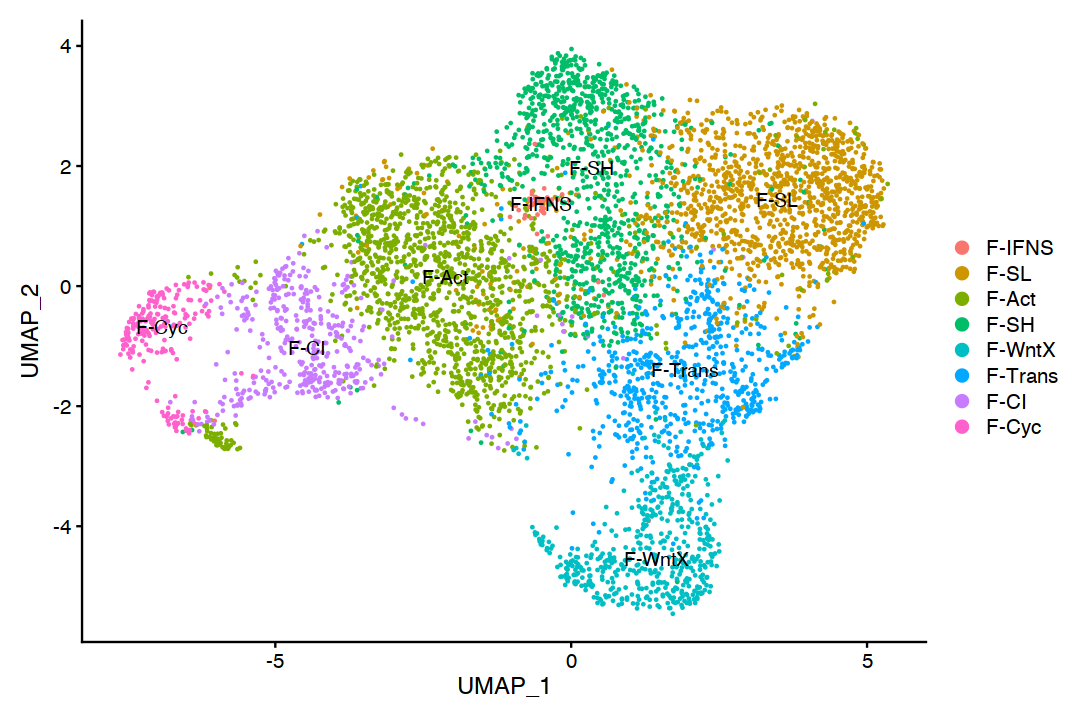

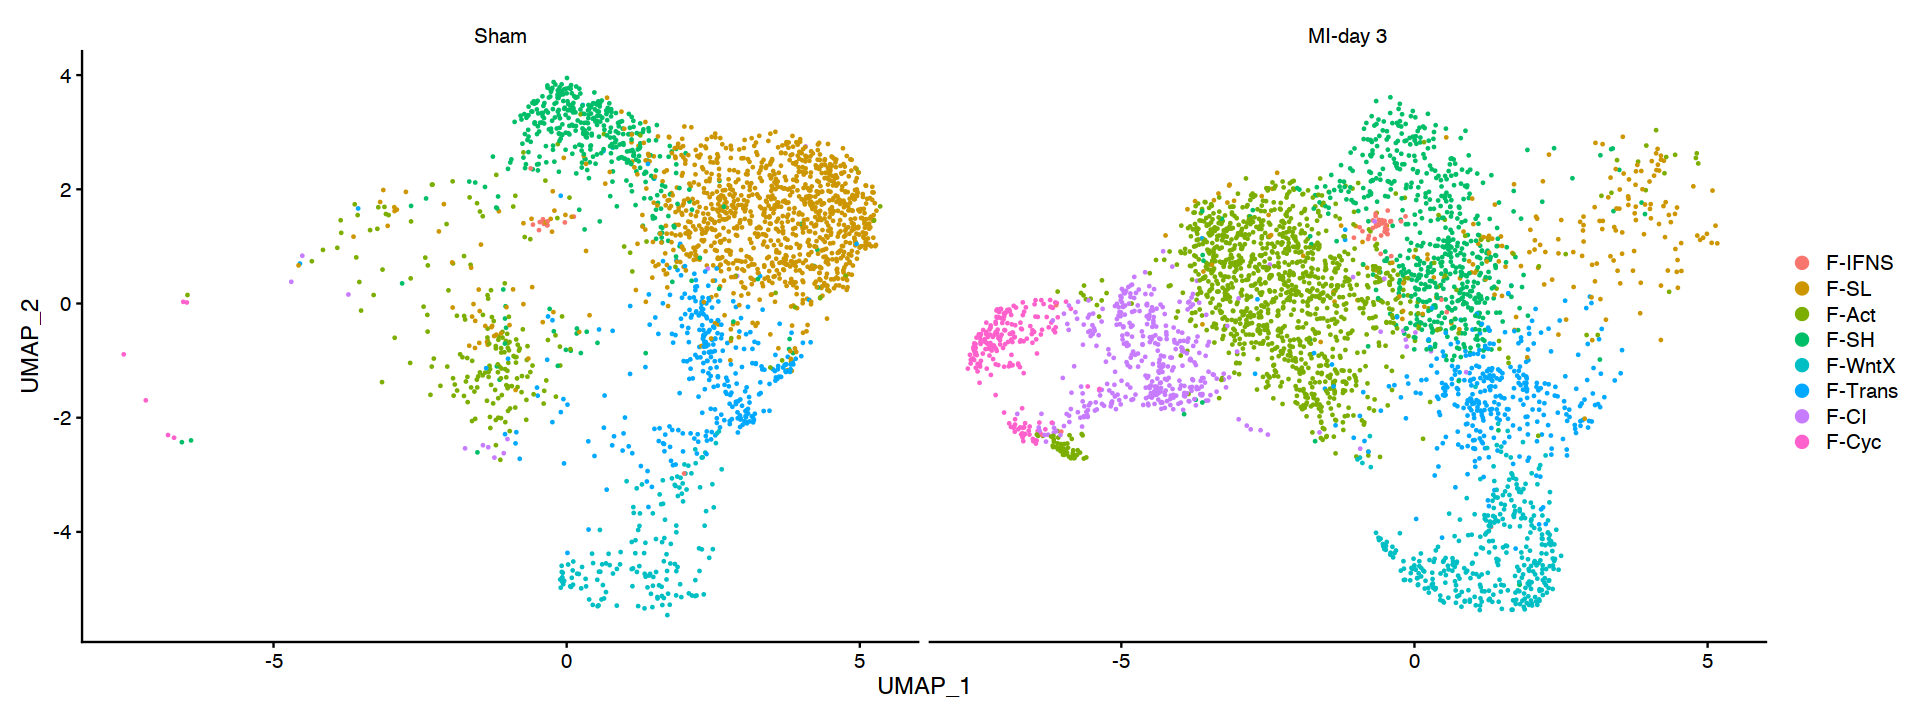

In [19]:
options(repr.plot.width=9, repr.plot.height=6)
DimPlot(genes.seurat, reduction = "umap", label = TRUE) 
options(repr.plot.width=16, repr.plot.height=6)
DimPlot(genes.seurat, reduction = "umap", split.by = "Condition", ncol=2)

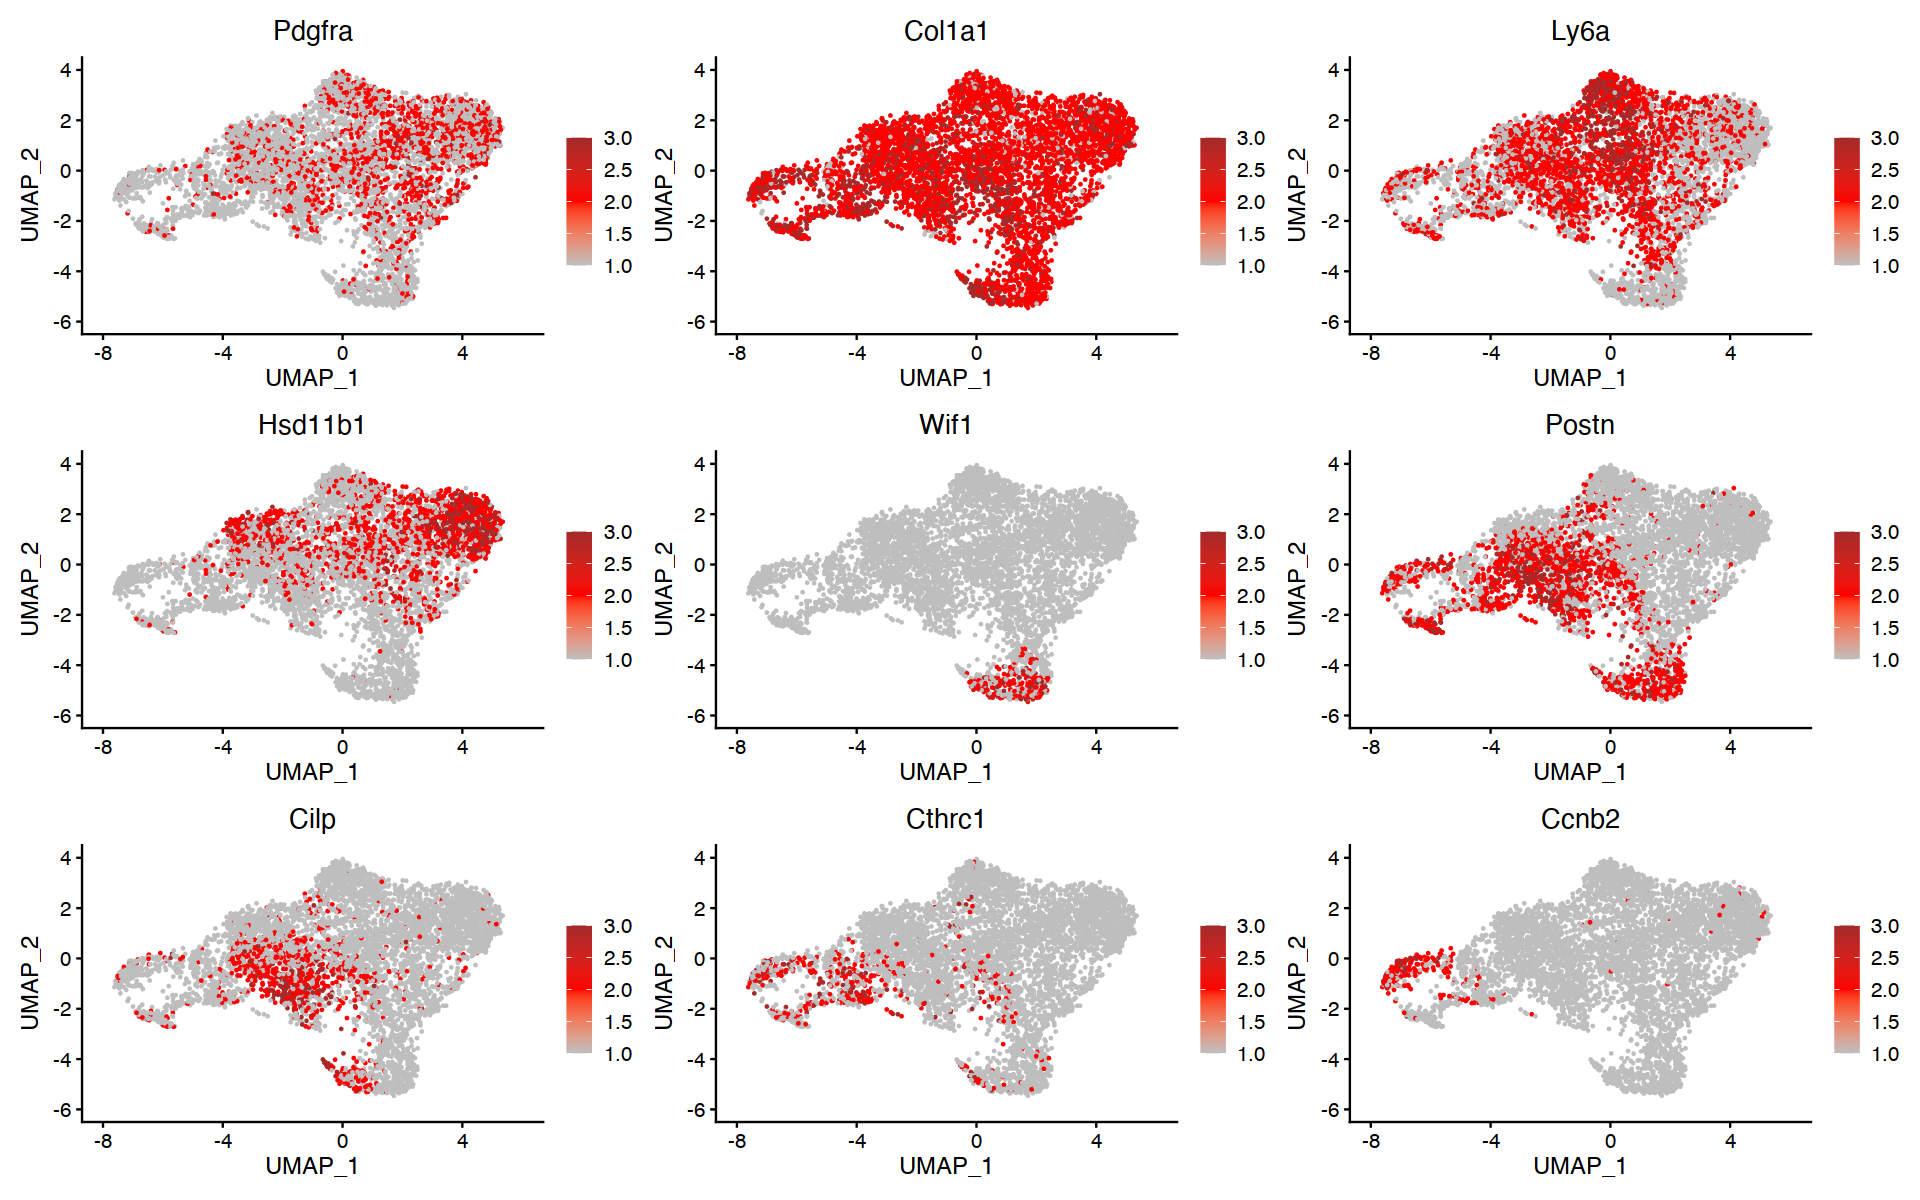

In [17]:
options(repr.plot.width=16, repr.plot.height=10)
FeaturePlot(genes.seurat, c("Pdgfra", "Col1a1", "Ly6a", "Hsd11b1", "Wif1",
                            "Postn", "Cilp", "Cthrc1", "Ccnb2"),
            cols = c("grey", "red", "brown"))

# Session information

In [20]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_AU.UTF-8/en_AU.UTF-8/en_AU.UTF-8/C/en_AU.UTF-8/en_AU.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cFIT_0.0.0.9000    cowplot_1.1.1      Matrix_1.3-4       dplyr_1.0.7       
[5] plyr_1.8.6         SeuratObject_4.0.2 Seurat_4.0.3       ggplot2_3.3.5     

loaded via a namespace (and not attached):
  [1] Rtsne_0.15            colorspace_2.0-2      deldir_0.2-10        
  [4] ellipsis_0.3.2        ggridges_0.5.3        IRdisplay_1.0        
  [7] futile.logger_1.4.3   base64enc_0.1-3       spatstat.data_2.1-0  
 [10] farver_2.1.0          leiden_0.3.9          listenv_0.8.0        
 [13] ggr